In [1]:
# Step 1: Importing necessary libraries for Data Cleaning, Visualization, EDA, and Model Building  
# These libraries provide the tools required to perform tasks such as data manipulation, 
# statistical analysis, machine learning, and model evaluation.

# Path handling
# Path module helps in handling file paths easily across different operating systems.
from pathlib import Path

# Data manipulation
# Pandas is used for data manipulation and analysis, providing data structures like DataFrame.
# NumPy provides support for large, multi-dimensional arrays and matrices, and includes a large collection of high-level mathematical functions.
import pandas as pd  
import numpy as np  

# Data Visualization
# Matplotlib is a plotting library used for creating static, animated, and interactive visualizations
# Seaborn is a data visualization library based on Matplotlib, providing a high-level interface for drawing attractive statistical graphics.
import matplotlib.pyplot as plt  
import seaborn as sns  

# Model Building and Evaluation
# This module splits data into training and testing sets for model training and validation.
# StandardScaler is used to standardize features by removing the mean and scaling to unit variance
# Recursive Feature Elimination (RFE) is used to select the most important features by recursively eliminating features and building a model on those features.
# Logistic Regression is a model used for binary classification tasks.
# Random Forest and Gradient Boosting are powerful ensemble learning methods used for classification tasks
# These metrics are used to evaluate model performance, including accuracy, classification report (precision, recall, F1-score), and ROC-AUC score.
# SMOTE (Synthetic Minority Over-sampling Technique) is a method used to address class imbalance by generating synthetic samples for the minority class.
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler 
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LogisticRegression  
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score  
from imblearn.over_sampling import SMOTE  


In [2]:
# Setting Pandas maximum column display to 100 columns
pd.set_option('display.max_columns', 100)

In [3]:
# Importing the Dataset and convert it to a DataFrame
dataset = Path.home()/'OneDrive'/'Documents'/'INDICINA DATA SCIENCE INTERVIEW'/'Indicina_DS_Challenge.csv'

fraud_df = pd.read_csv(dataset)

fraud_df.head(5)   # Printing the First 5 rows in the Dataframe

,Unnamed: 0,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
0,1,C10001,10/6/2019,9/9/2020,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,2,C10002,10/6/2019,7/4/2020,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,3,C10003,10/6/2019,9/17/2020,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,4,C10004,10/6/2019,8/24/2020,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0
4,5,C10005,10/6/2019,10/20/2020,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [4]:
# Checking the number of rows and columns in the DataFrame
# Checking the number of rows and columns in the DataFrame provides an overview of the dataset's size, 
# helping to assess its structure before and after data processing steps
fraud_df.shape

(8950, 22)

In [5]:
# Checking the datatype of all columns in the DataFrame
# This helps understand the structure of the data and identify potential transformations needed.
# Special focus will be given to columns with 'object' datatypes, as they may require conversion.

fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        8950 non-null   int64  
 1   cust_id                           8950 non-null   object 
 2   activated_date                    8937 non-null   object 
 3   last_payment_date                 8941 non-null   object 
 4   balance                           8948 non-null   float64
 5   balance_frequency                 8950 non-null   float64
 6   purchases                         8950 non-null   float64
 7   oneoff_purchases                  8950 non-null   float64
 8   installments_purchases            8950 non-null   float64
 9   cash_advance                      8838 non-null   float64
 10  purchases_frequency               8950 non-null   float64
 11  oneoff_purchases_frequency        8950 non-null   float64
 12  purcha

In [6]:
# Checking the columns with object as the datatype.
# Columns with 'object' datatype may contain categorical or datetime values that need to be transformed for further analysis.
object_df = fraud_df.select_dtypes(include='object')          # Creating a Dataframe of all object datatype columns

object_df.head(5)                     # Print the first 5 rows 

,cust_id,activated_date,last_payment_date
0,C10001,10/6/2019,9/9/2020
1,C10002,10/6/2019,7/4/2020
2,C10003,10/6/2019,9/17/2020
3,C10004,10/6/2019,8/24/2020
4,C10005,10/6/2019,10/20/2020


cust_id is the unique identifier for each customer and it comprises of string and integer. No datatype conversion will be done on it. activated_date and last_payment_date contain Date values and will be converted from object to datetime datatype.

In [7]:
# Converting activated_date and last_payment_date to datetime datatype
# The columns activated_date and last_payment_date contain date-related information stored
# as strings. Converting them to a datetime datatype will allow for proper date-based operations 
# such as filtering, sorting, and time-based analysis.
fraud_df['activated_date'] = pd.to_datetime(fraud_df['activated_date'])   

fraud_df['last_payment_date'] = pd.to_datetime(fraud_df['last_payment_date'])

fraud_df.head(4)           # Printing the first 4 rows

,Unnamed: 0,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
0,1,C10001,2019-10-06,2020-09-09,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,2,C10002,2019-10-06,2020-07-04,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,3,C10003,2019-10-06,2020-09-17,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,4,C10004,2019-10-06,2020-08-24,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0


In [8]:
# Deleting the Unnamed: 0 column
# Unnamed: 0 provides no useful information concerning thus the need to delete it
fraud_df = fraud_df.drop(columns=['Unnamed: 0'])

fraud_df.head(4)   # Printing the first 4 rows

,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
0,C10001,2019-10-06,2020-09-09,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,2019-10-06,2020-07-04,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,C10003,2019-10-06,2020-09-17,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,C10004,2019-10-06,2020-08-24,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0


Unnamed: 0 column has been properly deleted

In [9]:
# Checking the DataFrame datatypes after converting the Date columns to datetime datatype
# After converting the activated_date and last_payment_date columns to the datetime datatype
# checking the DataFrame’s datatypes ensures that the conversion was successful and that these columns are now properly formatted
# for date-based operations
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   cust_id                           8950 non-null   object        
 1   activated_date                    8937 non-null   datetime64[ns]
 2   last_payment_date                 8941 non-null   datetime64[ns]
 3   balance                           8948 non-null   float64       
 4   balance_frequency                 8950 non-null   float64       
 5   purchases                         8950 non-null   float64       
 6   oneoff_purchases                  8950 non-null   float64       
 7   installments_purchases            8950 non-null   float64       
 8   cash_advance                      8838 non-null   float64       
 9   purchases_frequency               8950 non-null   float64       
 10  oneoff_purchases_frequency        8950 non-null 

In [10]:
# Checking for Duplicate rows in the DataFrame
# Duplicate rows in the DataFrame may indicate redundant or erroneous data entries. 
# Identifying them helps ensure data integrity and prevent skewed analysis or model training
fraud_df.duplicated().sum()            

0

In [11]:
# Checking for missing values in the DataFrame
# Missing values in the DataFrame could impact data quality and analysis. 
# Identifying them helps determine whether imputation, deletion, or other handling methods 
# are necessary to maintain dataset integrity
fraud_df.isna().sum()

cust_id                               0
activated_date                       13
last_payment_date                     9
balance                               2
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                        112
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    321
prc_full_payment                      0
tenure                                0
fraud                                 0
dtype: int64

There are 13 missing values in activated_date, 9 in last_payment_date, 2 in balance, 112 in cash_advance, 1 in credit_limit and 321 in minimum_payments.

In [12]:
# Checking the Percentage of missing values in each columns
# Understanding the percentage of missing values in each column helps assess the extent of data incompleteness.
# If a column has a high percentage of missing values, it may need imputation, removal, or further investigation 
# to determine its impact on analysis.
(fraud_df.isna().sum() / len(fraud_df)) * 100

cust_id                             0.000000
activated_date                      0.145251
last_payment_date                   0.100559
balance                             0.022346
balance_frequency                   0.000000
purchases                           0.000000
oneoff_purchases                    0.000000
installments_purchases              0.000000
cash_advance                        1.251397
purchases_frequency                 0.000000
oneoff_purchases_frequency          0.000000
purchases_installments_frequency    0.000000
cash_advance_frequency              0.000000
cash_advance_trx                    0.000000
purchases_trx                       0.000000
credit_limit                        0.011173
payments                            0.000000
minimum_payments                    3.586592
prc_full_payment                    0.000000
tenure                              0.000000
fraud                               0.000000
dtype: float64

Percentage of missing values:
- activated_date: 0.145% missing
- last_payment_date: 0.1% missing
- balance: 0.22% missing
- cash_advance: 1.25% missing
- credit_limit: 0.01% missing
- minimum_payments: 3.59% missing

In [13]:
# Delecting rows with missing values
# Since no column has more than 50 percent missing values adn there is limited information to enable imputation process
# rows with missing values will be deleted to ensure data consistency and avoid introducing assumptions that could result
# in wrong analysis
fraud_df = fraud_df.dropna(axis=0)

In [14]:
# Verifying that all missing values were properly deleted
# Verifying that all missing values were properly deleted ensures that the dataset is now complete and free of missing values. 
# This step confirms that no missing data will negatively affect subsequent analysis or modeling.
fraud_df.isna().sum()

cust_id                             0
activated_date                      0
last_payment_date                   0
balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
fraud                               0
dtype: int64

In [15]:
# Creating four columns that include the year and month of credit activation and the last payment made by customers in Indicina.
# By creating four columns for the year and month of credit activation and the year and month of the last payment
# we assume that the time gap between activation and last payment may indicate potential fraudulent behavior
fraud_df['activated_year'] = fraud_df['activated_date'].dt.year          # credit activation year
fraud_df['activated_month'] = fraud_df['activated_date'].dt.month        # credit activation month

fraud_df['last_payment_year'] = fraud_df['last_payment_date'].dt.year     # last payment year
fraud_df['last_payment_month'] = fraud_df['last_payment_date'].dt.month   # last payment month

In [16]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8497 entries, 0 to 8949
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   cust_id                           8497 non-null   object        
 1   activated_date                    8497 non-null   datetime64[ns]
 2   last_payment_date                 8497 non-null   datetime64[ns]
 3   balance                           8497 non-null   float64       
 4   balance_frequency                 8497 non-null   float64       
 5   purchases                         8497 non-null   float64       
 6   oneoff_purchases                  8497 non-null   float64       
 7   installments_purchases            8497 non-null   float64       
 8   cash_advance                      8497 non-null   float64       
 9   purchases_frequency               8497 non-null   float64       
 10  oneoff_purchases_frequency        8497 non-null 

In [17]:
# Checking the number of rows and columns after deleting missing rows and Unnamed: 0 column
# After deleting Unnamed:0 column and rows with missing values, create new columns the number of rows and columns 
# in the DataFrame is expected to decrease
fraud_df.shape

(8497, 25)

### PART 1

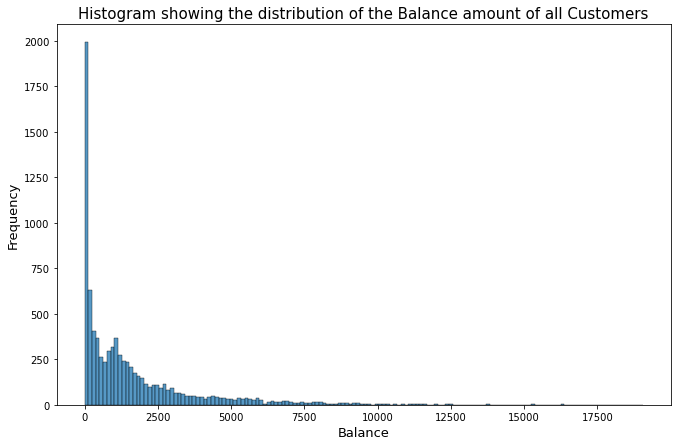

In [18]:
# Plotting an histogram of balance column.
# The distribution of balances among customers may provide insights into spending behavior and potential fraud patterns.
# A skewed distribution could indicate the presence of extreme values (e.g., abnormally high or low balances) 
# which may require further investigation.
plt.figure(figsize=(11, 7))

sns.histplot(data=fraud_df, x='balance', bins=150)   
plt.ylabel('Frequency', fontsize=13)
plt.xlabel('Balance', fontsize=13)
plt.title('Histogram showing the distribution of the Balance amount of all Customers', fontsize=15)
plt.show()

Assuming the Balance column represents the total amount a customer owes Indicina at any given time, a right-skewed histogram indicates that most customers have low to moderate balances, while a smaller group carries significantly higher balances. These customers with unusually high balances may warrant further investigation as potential fraudulent accounts. Thus let Ho be "The higher the account credit balance the higher the likelihood of it been a Fraudulent account"

In [19]:
# Step 1: Grouping Data by Activation Year and Month  
# The 'fraud_df' DataFrame is grouped by the columns 'activated_year' and 'activated_month'.  
# This allows us to analyze balance trends across different years and months of activation.  
# The aggregation functions 'mean' and 'median' are applied to the 'balance' column.  
# This provides a better understanding of the central tendency and variation in balance for each activation period.  
balance_summary_by_activation_year_and_month = (
    fraud_df.groupby(['activated_year', 'activated_month'])['balance'].agg(['mean', 'median']).reset_index()
)

# Step 2: Displaying the Result  
# The aggregated results are printed to visualize the balance summary by activation year and month.  
# This DataFrame shows the average and median balance for each year and month combination.
balance_summary_by_activation_year_and_month         # Printing the DataFrame  

,activated_year,activated_month,mean,median
0,2019,10,2548.794248,1545.598011
1,2019,11,1890.539524,1107.961644
2,2019,12,2051.316984,1193.351573
3,2020,1,1864.259536,1180.961924
4,2020,2,1784.641287,1018.880453
5,2020,3,1590.094278,894.357857
6,2020,4,1540.150147,969.583332
7,2020,5,1249.460309,779.431874
8,2020,6,971.212562,518.894713
9,2020,7,664.835110,251.144969


### PART 2

In [20]:
# Step 1: Filtering Data for Accounts Activated and Last Paid in 2020  
# This step extracts only the accounts where both the activation year and last payment year occurred in 2020.  
# The condition ensures that we focus on accounts that were active and had transactions within the same year.  
account_2020 = fraud_df[(fraud_df['activated_year'] == 2020) & (fraud_df['last_payment_year'] == 2020)].reset_index(drop=True)  

# Step 2: Cleaning Customer ID Data  
# The 'cust_id' column contains values prefixed with the letter 'C'.  
# We remove the 'C' to retain only numerical identifiers for consistency.  
account_2020['cust_id'] = account_2020['cust_id'].str.replace('C', '', regex=False)  

# Step 3: Formatting Activation Date  
# The 'activated_date' column is converted to 'YYYY-MM' format.  
# This standardizes the date representation to show only the year and month of activation.  
account_2020['activated_date'] = account_2020['activated_date'].dt.strftime('%Y-%m')  

# Step 4: Calculating Cash Advance Percentage  
# This metric indicates how much of the credit limit was used for cash advances.  
# It is calculated as: (cash_advance / credit_limit) * 100  
account_2020['cash_advance_pct'] = (account_2020['cash_advance'] / account_2020['credit_limit']) * 100  

# Step 5: Selecting Relevant Columns  
# The dataset is reduced to include only key features for analysis:  
# - 'cust_id': Unique identifier for customers  
# - 'activated_date': Standardized activation date  
# - 'last_payment_date': Last recorded payment date  
# - 'cash_advance': Total cash advance amount  
# - 'credit_limit': Credit limit for the account  
# - 'cash_advance_pct': Percentage of credit limit used as cash advance  
account_2020 = account_2020[['cust_id', 'activated_date', 'last_payment_date', 'cash_advance', 'credit_limit', 'cash_advance_pct']].reset_index(drop=True)  

# Display the final processed DataFrame (Table)
account_2020  

,cust_id,activated_date,last_payment_date,cash_advance,credit_limit,cash_advance_pct
0,12709,2020-01,2020-05-08,2431.292076,8000.0,30.391151
1,12710,2020-01,2020-05-26,0.000000,2000.0,0.000000
2,12712,2020-01,2020-10-20,0.000000,3000.0,0.000000
3,12713,2020-01,2020-08-22,0.000000,9000.0,0.000000
4,12714,2020-01,2020-04-26,78.763096,1500.0,5.250873
...,...,...,...,...,...,...
6011,19184,2020-07,2020-08-10,0.000000,500.0,0.000000
6012,19186,2020-07,2020-11-03,0.000000,1000.0,0.000000
6013,19188,2020-07,2020-06-03,0.000000,1000.0,0.000000
6014,19189,2020-07,2020-07-19,36.558778,500.0,7.311756


## PART 3

## INDICINA FRAUD MODEL BUILDING

## Model Code Overview
To evaluate the effectiveness of fraud detection in Indicina, two categories of models will be built:
 - Models Without SMOTE

 - Models With SMOTE

Purpose of Applying SMOTE:
 - SMOTE (Synthetic Minority Over-sampling Technique) will be applied in an effort to enhance model performance, with a particular focus on increasing the number of correctly predicted fraud accounts.

Evaluation Metrics:
- Models Without SMOTE will be assessed based on:

Precision: The model's ability to correctly identify fraudulent accounts.

ROC-AUC Score: Overall performance in distinguishing between fraud and non-fraud accounts.

- Models With SMOTE will be assessed based on:

Recall: The model’s ability to detect a high number of fraudulent accounts.

ROC-AUC Score: The effectiveness of correctly identifying both fraud and non-fraud cases.

This structured evaluation will provide insights into the impact of SMOTE on fraud detection and help determine the most effective model for real-world application.

### Model Feature spliting and Standardization

In [21]:
# Select numerical features and drop non-numeric columns
# X is the Independent feature for predicting the Target feature. 
# All object column, fraud, activated_date and last_payment_date will be dropped
# y is the Target feature.
X = fraud_df.select_dtypes(exclude=['object']).drop(columns=['fraud', 'activated_date', 'last_payment_date'])  
y = fraud_df['fraud']

# split X and y variable into test and training set
# random_state will ensures that the proportion of y in each split remains thesame, ensure consistency in model result.
# stratify will ensure that the proportion of classes in y, remains thesame in both train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardizing X_test and X_train to ensure that all features in X are in the scale
standardizer = StandardScaler()
X_train_scaled = standardizer.fit_transform(X_train)
X_test_scaled = standardizer.transform(X_test)

### Model Without SMOTE - Synthetic Minority Over-sampling Technique

### Random Forest Classifier Model

In [22]:
# Feature Selection and Classification using RandomForestClassifier with RFE 
# This script demonstrates the process of feature selection using Recursive Feature Elimination (RFE)
# and training a RandomForest Classifier for binary classification. 
# The model performance is evaluated using the ROC-AUC score and classification metrics.

# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Step 1: Instantiating RandomForest Classifier model
# RandomForestClassifier is used as the base model for feature selection
# and final classification. The random_state parameter ensures reproducibility.
rfc = RandomForestClassifier(random_state=42)

# Step 2: Applying RFE for Feature Selection
# RFE (Recursive Feature Elimination) is used to select the top 6 most important features.
# The RandomForestClassifier model is used as the estimator for RFE.
# It iteratively removes the least important features based on importance scores.
# The transformed feature set (X_train_rfe, X_test_rfe) contains only the 6 selected features.
rfe = RFE(rfc, n_features_to_select=6)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

# Step 3: Training the RandomForest Classifier on the Selected Features
# Train the model using only the selected features.
rfc.fit(X_train_rfe, y_train)

# Step 4: Making Predictions
# Generate predictions on the test set using the trained model.
# y_pred: Predicted class labels
# y_prob: Predicted probabilities for the positive class (needed for ROC-AUC evaluation)
y_pred = rfc.predict(X_test_rfe)
y_prob = rfc.predict_proba(X_test_rfe)[:, 1]  # Extracting probability for the positive class

# Step 5: Evaluating the Model
# Assess model performance using various metrics.
# Metrics Used:
# ROC-AUC Score: Measures the ability of the model to distinguish between classes.
# Accuracy Score: Measures overall correctness of predictions.
# Classification Report: Provides Precision, Recall, and F1-score for each class.
roc_auc = roc_auc_score(y_test, y_prob)
print(f'------------------------------RandomForest Classifier Model------------------------')
print(f"ROC-AUC Score > {roc_auc:.4f}")
print("Random Forest Accuracy > ", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Assumptions and Conclusions
# Assumptions:
# The dataset has already been preprocessed, including scaling of features.
# X_train_scaled and X_test_scaled contain the input features.
# y_train and y_test contain the target labels.
# The dataset is for a binary classification problem.
#
# Conclusions:
# The RandomForestClassifier is an ensemble method, which aggregates the results of multiple decision trees to make a prediction.
# RFE was applied to reduce the feature space and only select the 6 most important features, improving the model's performance.
# The ROC-AUC score and classification report provide insights into how well the model performs for imbalanced classes, especially for the minority class (fraud).
# Accuracy may not be the best metric in case of imbalanced data, hence precision, recall, and F1-score should be evaluated.

------------------------------RandomForest Classifier Model------------------------
ROC-AUC Score > 0.8857
Random Forest Accuracy >  0.9952941176470588

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1686
           1       0.88      0.50      0.64        14

    accuracy                           1.00      1700
   macro avg       0.94      0.75      0.82      1700
weighted avg       0.99      1.00      0.99      1700



### Logistic Regression Model

In [23]:
# Step 1: Instantiating LogisticRegression Model
# The model will be trained to distinguish between two classes based on the Independent features.
linear_model = LogisticRegression(random_state=42)

# Step 2: Selecting the 6 Most Important Features using Recursive Feature Elimination (RFE)
# Recursive Feature Elimination (RFE) is used to select the top 6 features that contribute most to the prediction.
# RFE works by recursively removing the least important features based on the performance of the model.
# Selected 6 important features based on the model's performance.
# Apply RFE on scaled training data
# Apply the selected features to the test data.
rfe1 = RFE(linear_model, n_features_to_select=6)  
X_train_rfe = rfe1.fit_transform(X_train_scaled, y_train)  
X_test_rfe = rfe1.transform(X_test_scaled)

# Step 3: Training the Logistic Regression Model using Selected Features
# After selecting the 6 most important features, the Logistic Regression model was trained using the transformed training data.
linear_model.fit(X_train_rfe, y_train)

# Step 4: Making Predictions with the Trained Model
# Predicting the target variable (fraud or non-fraud) on the test set using the trained model.
y_pred = linear_model.predict(X_test_rfe)  

# Step 5: Assigning Probabilities to 'y_prob' for ROC-AUC Calculation
# The Logistic Regression model also outputs the probabilities of the class predictions.
# These probabilities are used to evaluate the model’s performance more thoroughly (using ROC-AUC).
# Extracted the probability for the positive class (fraud).
y_prob = linear_model.predict_proba(X_test_rfe)[:, 1]  

# Step 6: Measuring Model Performance using Different Metrics**
# Evaluated the model's performance based on multiple metrics:
# Accuracy Score: How well the model classifies the data.
# ROC-AUC Score: A metric to assess the model’s ability to distinguish between classes.
# Classification Report: Includes precision, recall, f1-score, and support for each class.
acc_score = accuracy_score(y_test, y_pred)  
roc_auc = roc_auc_score(y_test, y_prob)     
class_report = classification_report(y_test, y_pred)

# Step 7: Printing Model Evaluation Results**
# Printing out the various performance evaluation metrics.
print(f'-------------------LogisticRegression Fraud Model Evaluation-----------')
print(f'Model Prediction Accuracy Score > ', acc_score)
print(f'Model ROC-AUC Score >  {roc_auc:.4f}') 
print(f'\nClassification Report:')  
print(class_report)

# Conclusion/Assumptions:
# Logistic Regression is a simple and effective classification model. We used RFE for feature selection to identify and retain the top 6 most influential features.
# Model evaluation includes three primary metrics: accuracy, ROC-AUC score, and a detailed classification report.
# Precision and recall are important in imbalanced datasets (such as fraud detection), so the classification report will be particularly useful in assessing performance for the minority class (fraud).
# Since fraud detection is typically an imbalanced classification problem, metrics like precision, recall, and F1-score are more insightful than accuracy alone.


-------------------LogisticRegression Fraud Model Evaluation-----------
Model Prediction Accuracy Score >  0.9964705882352941
Model ROC-AUC Score >  0.8559

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1686
           1       1.00      0.57      0.73        14

    accuracy                           1.00      1700
   macro avg       1.00      0.79      0.86      1700
weighted avg       1.00      1.00      1.00      1700



### Gradient Boosting Classifier Model

In [24]:
# Step 1: Instantiating Gradient Boosting Classifier Model**
# Instantiate a Gradient Boosting Classifier model. Gradient Boosting is an ensemble method that builds multiple decision trees in a sequential manner. Each tree tries to correct the errors of the previous one.
# `random_state=42` is used for reproducibility, ensuring the same results each time the model is run.
gb = GradientBoostingClassifier(random_state=42)

# Step 2: Applying Recursive Feature Elimination (RFE) to Select 10 Top Features
# Recursive Feature Elimination (RFE) is used to select the 10 most important features based on the model's performance.
# RFE works by recursively removing the least important features and building the model with the remaining features.
# Apply RFE on scaled training data.
# Apply the selected features to the test data.
rfe = RFE(gb, n_features_to_select=10)  
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled) 

# Step 3: Training the Gradient Boosting Model using the Selected Features
# After selecting the top 10 features, we train the Gradient Boosting Classifier using the transformed training data.
gb.fit(X_train_rfe, y_train)

# Step 4: Making Predictions using the Trained Model
# Used the trained model to predict the target variable (fraud or non-fraud) on the test set.
y_pred = gb.predict(X_test_rfe)

# Step 5: Assigning Probabilities to 'y_prob' for ROC-AUC Calculation
# Gradient Boosting also outputs class probabilities, which are useful for evaluating the model's performance more thoroughly.
# These probabilities are used to calculate the ROC-AUC score, which measures the model’s ability to distinguish between classes.
# Extract the probability for the positive class (fraud)
y_prob = gb.predict_proba(X_test_rfe)[:, 1]  

# Step 6: Measuring Model Performance using Different Metrics**
# We evaluate the model using the following performance metrics:
# ROC-AUC Score: Measures the model’s ability to distinguish between the classes.
# Accuracy: Measures how well the model classifies the test data.
# Classification Report: Provides precision, recall, f1-score, and support for each class.
roc_auc = roc_auc_score(y_test, y_prob) 
accuracy = accuracy_score(y_test, y_pred) 

# Step 7: Printing Model Evaluation Results
# Printing out the evaluation metrics, including ROC-AUC score, accuracy, and classification report.
print(f'-----------------------GradientBoosting Fraud Model Evaluation--------------------')
print(f"ROC-AUC Score > {roc_auc:.4f}") 
print("Gradient Boosting Accuracy > ", accuracy)
print("\nClassification Report:")  
print(classification_report(y_test, y_pred))

# Conclusion/Assumptions:
# Gradient Boosting is an ensemble method that is effective in handling imbalanced datasets like fraud detection.
# RFE (Recursive Feature Elimination) helps select the top 10 most important features for model training, which should improve performance and reduce overfitting.
# We use multiple metrics to evaluate the model. Given that fraud detection is an imbalanced classification problem, ROC-AUC score, precision, recall, and F1-score are more informative than accuracy alone.
# The selected features are likely the most predictive in terms of distinguishing between the two classes (fraud or non-fraud).


-----------------------GradientBoosting Fraud Model Evaluation--------------------
ROC-AUC Score > 0.8606
Gradient Boosting Accuracy >  0.9952941176470588

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1686
           1       0.80      0.57      0.67        14

    accuracy                           1.00      1700
   macro avg       0.90      0.79      0.83      1700
weighted avg       0.99      1.00      0.99      1700



### Model without SMOTE Performance Evaluation Summary
Based on the evaluation metrics for Logistic Regression, Gradient Boosting Classifier, and Random Forest Classifier, the Logistic Regression model emerges as the best-performing model for fraud analysis.

Reasoning:
 - Precision: The model achieves a perfect precision score of 1.0 for both fraud and non-fraud predictions, indicating zero false positives.

 - ROC-AUC Score: With a strong ROC-AUC score of 0.8559, the model demonstrates a high overall ability to differentiate between fraudulent and non-fraudulent accounts.

This suggests that Logistic Regression is the most reliable model for fraud detection when prioritizing precision and overall classification performance.  

### What explanatory variable was the most powerful predictor for fraud?  

In [25]:
# The objective of the following code is to identify and display the most powerful predictor (feature) for fraud detection
# based on the fit logistic regression model without SMOTE, and to display its coefficient. 
# The predictor that has the largest coefficient is assumed to be the most powerful one for 
# distinguishing between fraud and non-fraud cases in your dataset

# Step 1: The aim is to extract the names of the features that were selected by the Recursive Feature Elimination (RFE) process
# rfe1.support_ is a Boolean array that indicates which features were selected by the RFE method. 
# Using X_train.columns[rfe1.support_] to get the actual names of the selected features
predictor = X_train.columns[rfe1.support_]

# Step 2: The aim here is to obtain the coefficients (weights) of the selected features in the logistic regression model. 
# These coefficients represent the strength and direction of the relationship between each feature and the target variable 
# (fraud or non-fraud)
coefficients = linear_model.coef_[0]

# Step 3: To create a DataFrame that pairs each selected feature (predictor) with its corresponding coefficient
# making it easier to analyze and interpret the relationship between each feature and the target variable (fraud).
#  A pandas DataFrame is created with two columns:
# 'Predictor': The names of the features selected by RFE.
# 'Coefficient': The values of the corresponding coefficients, formatted to two decimal places for readability using 
# '{:.2f}'.format(x)
predictor_df = pd.DataFrame({
    'Predictor': predictor,
    'Coefficient': ['{:.2f}'.format(x) for x in coefficients]
})

# Step 4: The aim here is to sort the features by their coefficient values in descending order to identify the most 
# influential predictor.
# The sort_values function sorts the predictor_df DataFrame by the 'Coefficient' column in descending order (ascending=False), 
# so that the predictor with the highest coefficient is at the top. The reset_index(drop=True) is used to reset the index 
# for better readability after sorting
predictor_df = predictor_df.sort_values(by='Coefficient', ascending=False).reset_index(drop=True)

# Assumptions
# To identify the most powerful predictor (the feature with the highest coefficient value), 
# the head(1) function extracts the top row (the feature with the highest positive coefficient).
# head(1) retrieves the first row from the sorted DataFrame, which corresponds to the predictor with the highest coefficient. 
# This predictor is considered the most powerful for fraud prediction.
predictor_df.head(1)

,Predictor,Coefficient
0,purchases,1.30


### Model With SMOTE - Synthetic Minority Over-sampling Technique

### Gradient Boosting Classifier Model

In [ ]:
# Step 1: Instantiating Gradient Boosting Classifier Model
# initialize the Gradient Boosting Classifier to serve as our base model for feature selection and training.
# Setting a fixed random_state ensures reproducibility of results.
gb = GradientBoostingClassifier(random_state=42)

# Step 2: Feature Selection using Recursive Feature Elimination (RFE)
# Identify the 10 most important features that contribute to fraud detection.
# RFE iteratively removes the least important features based on the model’s performance.
rfe = RFE(gb, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

# Step 3: Handling Class Imbalance using SMOTE
# Since fraud detection is an imbalanced problem, we use SMOTE to generate synthetic minority class samples.
# SMOTE oversamples the minority class to balance the dataset, preventing model bias toward the majority class.
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_rfe, y_train)

# Step 4: Training the Model with Resampled Data
# Train the Gradient Boosting model on the balanced dataset to improve fraud detection performance.
# The model is trained using the new dataset generated by SMOTE.
gb.fit(X_train_resampled, y_train_resampled)

# Step 5: Making Predictions
# Use the trained model to predict fraud and non-fraud cases.
# The model predicts both class labels and probabilities for fraud occurrence.
y_pred = gb.predict(X_test_rfe)
y_prob = gb.predict_proba(X_test_rfe)[:, 1]

# Step 6: Evaluating Model Performance and Printing it out
# Measure how well the model identifies fraudulent accounts.
# We use ROC-AUC, accuracy, and classification report to evaluate precision, recall, and F1-score.
roc_auc = roc_auc_score(y_test, y_prob)
print(f'-------------------------GradientBoosting Fraud Model Evaluation---------------------')
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("Gradient Boosting Accuracy: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Assumptions:
# The dataset contains an imbalanced distribution of fraud and non-fraud cases, requiring SMOTE for better performance.
# The top 10 features selected using RFE provide the best predictive power for fraud detection.
# Gradient Boosting Classifier is assumed to be an effective model for fraud classification based on Non assumption on the type
# of relationship between features
# Performance is evaluated using accuracy, ROC-AUC score, and classification report, which are standard fraud detection metrics.

### Logistic Regression Model

In [ ]:
# Step 1: Instantiate Logistic Regression Model
# The model will be trained to distinguish between fraudulent and non-fraudulent accounts.
linear_model = LogisticRegression(random_state=42)

# Step 2: Feature Selection using Recursive Feature Elimination (RFE)
# RFE selects the 6 most important features based on the model's performance.
rfe2 = RFE(linear_model, n_features_to_select=6)
X_train_rfe = rfe2.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe2.transform(X_test_scaled)

# Step 3: Apply SMOTE to Address Data Imbalance
# SMOTE generates synthetic samples for the minority class to improve model performance.
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_rfe, y_train)

# Step 4: Train the Model
# The model is trained on the resampled dataset containing balanced fraud and non-fraud cases.
linear_model.fit(X_train_resampled, y_train_resampled)

# Step 5: Make Predictions on Test Data
y_pred = linear_model.predict(X_test_rfe)
y_prob = linear_model.predict_proba(X_test_rfe)[:, 1]  #  # Extract probability for the positive class (fraud)

# Step 6: Evaluate the Model using Key Metrics
acc_score = accuracy_score(y_test, y_pred)  # Model accuracy
roc_auc = roc_auc_score(y_test, y_prob)  # ROC-AUC Score
class_report = classification_report(y_test, y_pred)  # Precision, Recall, F1-score

# Print Model Evaluation Results
print(f'-------------------Logistic Regression Fraud Model Evaluation-------------------')
print(f'Model Prediction Accuracy Score > {acc_score:.4f}')
print(f'Model ROC-AUC Score > {roc_auc:.4f}')
print(f'\nClassification Report:\n{class_report}')

# Assumptions:
# The dataset contains an imbalanced distribution of fraud and non-fraud cases, requiring SMOTE for better performance.
# The top 6 features selected using RFE provide the best predictive power for fraud detection.
# Logistic Regression is assumed to be an effective model for fraud classification based on interpretability and performance.
# Performance is evaluated using accuracy, ROC-AUC score, and classification report, which are standard fraud detection metrics.


### RandomForest Classifier Model

In [ ]:
# Step 1: Instantiate RandomForest Classifier Model
# The model will be used for both feature selection and classification.
rfc = RandomForestClassifier(random_state=42)

# Step 2: Feature Selection using Recursive Feature Elimination (RFE)
# RFE selects the 6 most important features based on the Random Forest model's feature importance.
rfe = RFE(rfc, n_features_to_select=6)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

# Step 3: Handling Class Imbalance using SMOTE
# SMOTE (Synthetic Minority Over-sampling Technique) is applied to the training data.
# This balances the dataset by generating synthetic samples for the minority class (fraud cases).
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_rfe, y_train)

# Step 4: Train the RandomForest Classifier Model
# The model is trained using the resampled dataset.
rfc.fit(X_train_resampled, y_train_resampled)

# Step 5: Make Predictions on the Test Set
y_pred = rfc.predict(X_test_rfe)
y_prob = rfc.predict_proba(X_test_rfe)[:, 1]  # Extract probability for the positive class (fraud)

# Step 6: Evaluate Model Performance
roc_auc = roc_auc_score(y_test, y_prob)  # Measure model's ability to distinguish between classes
acc_score = accuracy_score(y_test, y_pred)  # Overall accuracy of the model
class_report = classification_report(y_test, y_pred)  # Precision, recall, and F1-score evaluation

# Step 7: Display Model Performance Metrics
print(f'-------------------Random Forest Fraud Model Evaluation-------------------')
print(f'Model Prediction Accuracy Score: {acc_score:.4f}')
print(f'Model ROC-AUC Score: {roc_auc:.4f}')
print(f'\nClassification Report:')
print(class_report)

# Assumptions:
# The dataset is imbalanced, making SMOTE a necessary technique for improving fraud detection.
# Feature selection via RFE helps improve model efficiency by reducing irrelevant features.
# Random Forest is assumed to be effective for this classification problem due to its ability to handle non-linearity and high-dimensional data.
# ROC-AUC is used as a key metric since fraud detection is a class-imbalanced problem, making accuracy alone insufficient.


### Model with SMOTE Performance Evaluation Summary
Based on the evaluation metrics of Logistic Regression, Gradient Boosting Classifier, and Random Forest Classifier, the Logistic Regression model emerges as the best-performing model for fraud analysis.

The key reason for this is its high ability to identify fraudulent accounts, correctly detecting 79% of fraud cases. Additionally, it achieves a ROC-AUC score of 0.8573, indicating a strong overall ability to distinguish between fraudulent and non-fraudulent accounts in Indicina.

This suggests that Logistic Regression is the most reliable model for fraud detection when prioritizing the identification of fraud cases and overall classification performance


### What explanatory variable was the most powerful predictor for fraud?  

In [ ]:
# The objective of the following code is to identify and display the most powerful predictor (feature) for fraud detection
# based on the fit logistic regression model without SMOTE, and to display its coefficient. 
# The predictor that has the largest coefficient is assumed to be the most powerful one for 
# distinguishing between fraud and non-fraud cases in your dataset

# Step 1: The aim is to extract the names of the features that were selected by the Recursive Feature Elimination (RFE) process
# rfe2.support_ is a Boolean array that indicates which features were selected by the RFE method. 
# Using X_train.columns[rfe1.support_] to get the actual names of the selected features
predictor = X_train.columns[rfe2.support_]

# Step 2: The aim here is to obtain the coefficients (weights) of the selected features in the logistic regression model. 
# These coefficients represent the strength and direction of the relationship between each feature and the target variable 
# (fraud or non-fraud)
coefficients = linear_model.coef_[0]

# Step 3: To create a DataFrame that pairs each selected feature (predictor) with its corresponding coefficient
# making it easier to analyze and interpret the relationship between each feature and the target variable (fraud).
#  A pandas DataFrame is created with two columns:
# 'Predictor': The names of the features selected by RFE.
# 'Coefficient': The values of the corresponding coefficients, formatted to two decimal places for readability using 
# '{:.2f}'.format(x)
predictor_df = pd.DataFrame({
    'Predictor': predictor,
    'Coefficient': ['{:.2f}'.format(x) for x in coefficients]
})

# Step 4: The aim here is to sort the features by their coefficient values in descending order to identify the most 
# influential predictor.
# The sort_values function sorts the predictor_df DataFrame by the 'Coefficient' column in descending order (ascending=False), 
# so that the predictor with the highest coefficient is at the top. The reset_index(drop=True) is used to reset the index 
# for better readability after sorting
predictor_df = predictor_df.sort_values(by='Coefficient', ascending=False).reset_index(drop=True)

# To identify the most powerful predictor (the feature with the highest coefficient value), 
# the head(1) function extracts the top row (the feature with the highest positive coefficient).
# head(1) retrieves the first row from the sorted DataFrame, which corresponds to the predictor with the highest coefficient. 
# This predictor is considered the most powerful for fraud prediction.
predictor_df.head(1)